In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# import libraries 
import pickle

import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import random

In [3]:
with open("/home/lacie/Data/traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("/home/lacie/Data/traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("/home/lacie/Data/traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [4]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [5]:
X_train.shape

(34799, 32, 32, 3)

In [6]:
y_train.shape

(34799,)

36

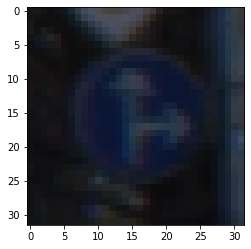

In [7]:
i = 1001
plt.imshow(X_train[i]) # Show images are not shuffled
y_train[i]


In [9]:
## Shuffle the dataset 
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [10]:
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)
X_test_gray  = np.sum(X_test/3, axis=3, keepdims=True)
X_validation_gray  = np.sum(X_validation/3, axis=3, keepdims=True) 

In [11]:
X_train_gray_norm = (X_train_gray - 128)/128 
X_test_gray_norm = (X_test_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128

In [12]:
X_train_gray.shape

(34799, 32, 32, 1)

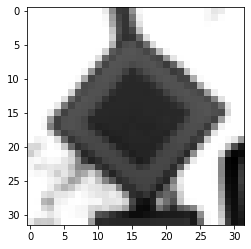

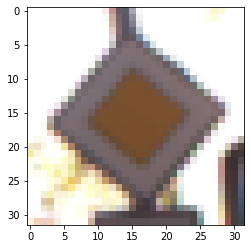

In [13]:
i = 610
plt.imshow(X_train_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_train[i])

In [14]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from subprocess import check_output
from sklearn.model_selection import train_test_split

In [15]:
image_shape = X_train_gray[i].shape

In [16]:
image_shape

(32, 32, 1)

In [18]:
cnn_model = tf.keras.Sequential()
cnn_model.add(tf.keras.layers.Conv2D(32,3, 3, input_shape = image_shape, activation='relu'))
cnn_model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(tf.keras.layers.Dropout(0.25))
cnn_model.add(tf.keras.layers.Flatten())
cnn_model.add(tf.keras.layers.Dense(128, activation='relu'))
cnn_model.add(tf.keras.layers.Dropout(0.5))
cnn_model.add(tf.keras.layers.Dense(43, activation = 'sigmoid'))

In [19]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=keras.optimizers.Adam(0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False),metrics =['accuracy'])

In [21]:
history = cnn_model.fit(X_train_gray_norm,
                       y_train,
                        batch_size=32,
                        epochs=60,
                        verbose=1,
                        validation_data = (X_validation_gray_norm,y_validation))

Epoch 1/60
1088/1088 [==============================] - 6s 3ms/step - loss: 1.9496 - accuracy: 0.4571 - val_loss: 0.7740 - val_accuracy: 0.7871
Epoch 2/60
1088/1088 [==============================] - 4s 4ms/step - loss: 0.7263 - accuracy: 0.7783 - val_loss: 0.4463 - val_accuracy: 0.8703
Epoch 3/60
1088/1088 [==============================] - 5s 4ms/step - loss: 0.4862 - accuracy: 0.8494 - val_loss: 0.3604 - val_accuracy: 0.8952
Epoch 4/60
1088/1088 [==============================] - 4s 3ms/step - loss: 0.3805 - accuracy: 0.8814 - val_loss: 0.3170 - val_accuracy: 0.9122
Epoch 5/60
1088/1088 [==============================] - 4s 4ms/step - loss: 0.3218 - accuracy: 0.9006 - val_loss: 0.2730 - val_accuracy: 0.9295
Epoch 6/60
1088/1088 [==============================] - 4s 4ms/step - loss: 0.2771 - accuracy: 0.9134 - val_loss: 0.2342 - val_accuracy: 0.9356
Epoch 7/60
1088/1088 [==============================] - 4s 4ms/step - loss: 0.2461 - accuracy: 0.9222 - val_loss: 0.2544 - val_accuracy:

In [22]:
score = cnn_model.evaluate(X_test_gray_norm, y_test,verbose=0)
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Accuracy : 0.9429


In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

KeyError: 'acc'

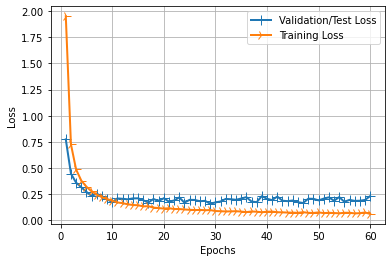

In [24]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+ 1)
line1 = plt.plot(epochs, val_loss_values, label = 'Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label= 'Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker= '4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

In [25]:
import matplotlib.pyplot as plt

history_dict = history.history
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(loss_values)+ 1)
line1 = plt.plot(epochs, val_acc_values, label = 'Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label= 'Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker= '4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

KeyError: 'acc'

In [26]:
cnn_model.save("./trafficSign.h5")

In [27]:
#from keras.models import load_model
model = tf.keras.models.load_model('./trafficSign.h5')

In [28]:
from keras.utils.vis_utils import plot_model
%matplotlib inline

** Note:Perform conda install graphviz, pip install graphviz and pip install pydot then run below cell. You can also check this documentation for setup : https://www.codesofinterest.com/2017/02/visualizing-model-structures-in-keras.html . Next 3 cells are not important you can execute ande check the other cells

In [31]:
#Plotting the model archictecture
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [32]:
from tensorflow.keras.utils import plot_model
plot_model(cnn_model, to_file='model.png',
          show_shapes= True,
          show_layer_names = True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


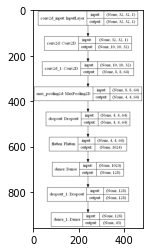

In [33]:
#Reading the model architecture image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('model.png')
plt.imshow(img)
plt.show()

In [34]:
#get the predictions for the test data
predicted_classes = cnn_model.predict_classes(X_test_gray_norm)
#get the indices to be plotted
y_true = y_test

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
cm

AttributeError: 'Sequential' object has no attribute 'predict_classes'

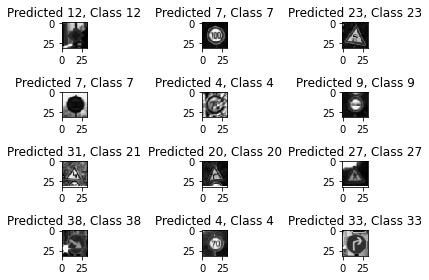

In [32]:
for i in range(0,12):
    plt.subplot(4,3,i+1)
    plt.imshow(X_test_gray_norm[i+10].squeeze(), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[i+10], y_true[i+10]))
    plt.tight_layout()

In [33]:
#Printing the classification report
from sklearn.metrics import classification_report
predictions = model.predict_classes(X_test_gray )
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.01      1.00      0.02        60
           1       0.99      0.65      0.78       720
           2       0.97      0.64      0.77       750
           3       0.93      0.10      0.17       450
           4       1.00      0.24      0.39       660
           5       0.00      0.00      0.00       630
           6       0.00      0.00      0.00       150
           7       1.00      0.01      0.01       450
           8       0.00      0.00      0.00       450
           9       1.00      0.14      0.24       480
          10       0.99      0.50      0.66       660
          11       0.96      0.71      0.82       420
          12       1.00      0.29      0.45       690
          13       1.00      0.95      0.98       720
          14       1.00      0.36      0.53       270
          15       1.00      0.00      0.01       210
          16       1.00      0.77      0.87       150
          17       1.00    

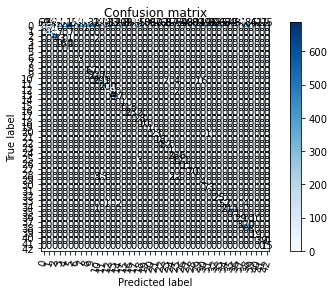

In [34]:
# Confussion matrix 
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=75) 
    plt.yticks(tick_marks, classes)
    

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

class_names = range(43)
cm = confusion_matrix(predictions,y_test)

plt.figure(2)
plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')